In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import ast
import collections
import torch
from torchvision import transforms
from wordcloud import WordCloud, STOPWORDS
import json

In [2]:
captions = np.load('embeddings_processed/list_of_list_of_file_captions.npy',allow_pickle = True)[:1000]

instances = np.load('embeddings_processed/list_of_list_of_file_instances.npy',allow_pickle = True)[:1000]

stuff = np.load('embeddings_processed/list_of_list_of_file_stuff.npy',allow_pickle = True)[:1000]

image_id_list = np.load('embeddings_processed/image_id_list.npy',allow_pickle = True)[:1000]

cocoval_embeddings = np.load('embeddings_processed/alexnet_cocoval_fc7_recent.npy')[:1000,:]

# compute percentile thresholds

In [3]:
# get embedding percentile thresholds
np.random.seed(90)
cocoval_embeddings = cocoval_embeddings + np.random.randn(*cocoval_embeddings.shape)/1000000
sorted_indices_embedding = np.argsort(cocoval_embeddings,axis = 0)

indices_90_embedding = sorted_indices_embedding[int(90/100*cocoval_embeddings.shape[0]-1),:]
embedding_threshold_90 = cocoval_embeddings[indices_90_embedding, range(4096)].reshape(1,4096)


# compute co-active embedding features between image pairs

In [4]:
cocoval_embeddings_active = (cocoval_embeddings >= embedding_threshold_90)*1

cocoval_embeddings_active_t = cocoval_embeddings_active.T
cocoval_embeddings_active_expanded = np.expand_dims(cocoval_embeddings_active, axis=2)
cocoval_embeddings_active_t_expanded = np.expand_dims(cocoval_embeddings_active_t, axis=0)
co_active_feats = cocoval_embeddings_active_expanded*cocoval_embeddings_active_t_expanded

co_active_features_cocoval_emb = np.sum(co_active_feats,axis=1)


co_active_features_cocoval_emb_no_same_duplicate = co_active_features_cocoval_emb.copy()

# histogram of the number of co-active embedding features between unique image pairs

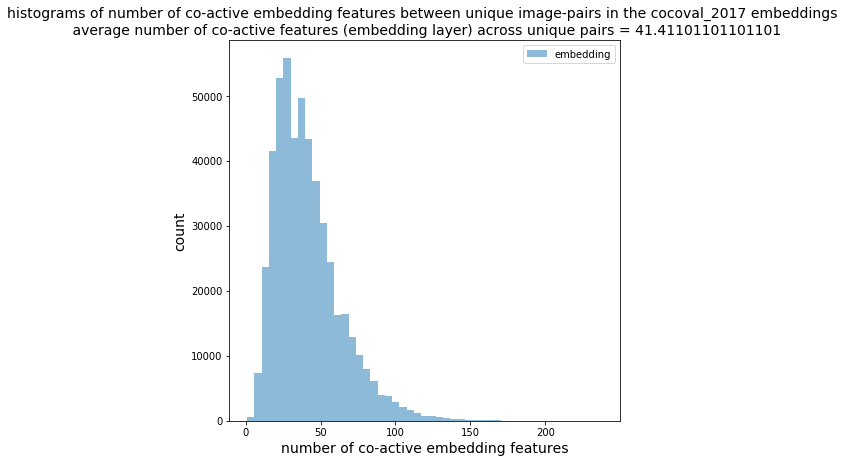

In [17]:
co_active_features_cocoval_emb_no_same_duplicate = []
for index_1 in range(co_active_features_cocoval_emb.shape[0]):
    for index_2 in range(co_active_features_cocoval_emb.shape[0]):
        if index_1 < index_2:
            co_active_features_cocoval_emb_no_same_duplicate.append(co_active_features_cocoval_emb[index_1, index_2])
            
co_active_features_cocoval_emb_no_same_duplicate = np.array(co_active_features_cocoval_emb_no_same_duplicate)
average_cocoval_emb = np.average(co_active_features_cocoval_emb_no_same_duplicate)
    
bins=np.linspace(np.min(co_active_features_cocoval_emb_no_same_duplicate), np.max(co_active_features_cocoval_emb_no_same_duplicate),50)
plt.figure(figsize=(7,7))
plt.title('histograms of number of co-active embedding features between unique image-pairs in the cocoval_2017 embeddings \n average number of co-active features (embedding layer) across unique pairs = '+str(average_cocoval_emb), fontsize=14)
plt.hist(co_active_features_cocoval_emb_no_same_duplicate.flatten(),bins=bins, label = 'embedding', alpha = 0.5)
plt.ylabel('count',fontsize=14)
plt.xlabel('number of co-active embedding features',fontsize=14)
plt.legend()
plt.show()
plt.close()

# heatmap of number of co-active embedding features between all image-pairs

Text(0, 0.5, 'Image index')

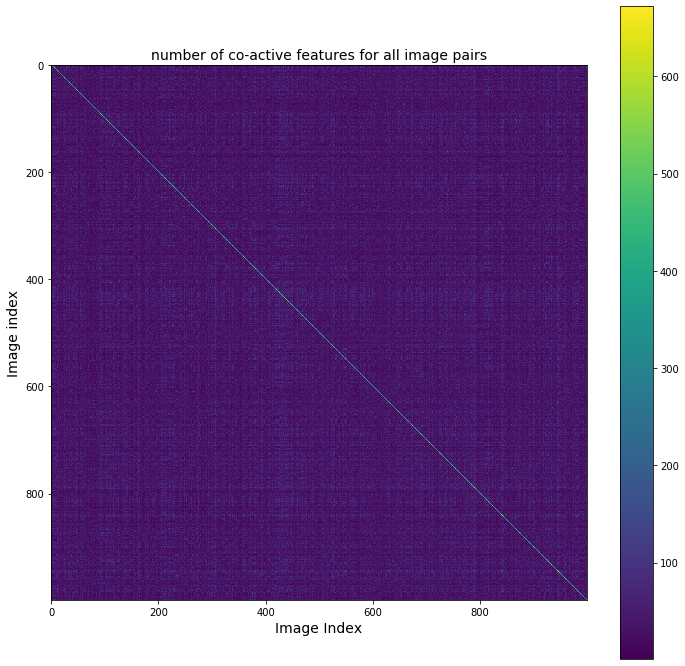

In [14]:
co_active_feats_sum = np.squeeze(np.sum(co_active_feats, axis=1))
plt.figure(figsize=(12,12))
plt.title('number of co-active embedding features for all image pairs', fontsize=14)
plt.imshow(co_active_feats_sum)
plt.colorbar()

plt.ylabel('number of co-active features ',fontsize=14)
plt.xlabel('Image Index',fontsize=14)
plt.ylabel('Image index',fontsize=14)

# visualization of top-50 image pairs with most co-active embedding features, common "instance" and "stuff" objects 

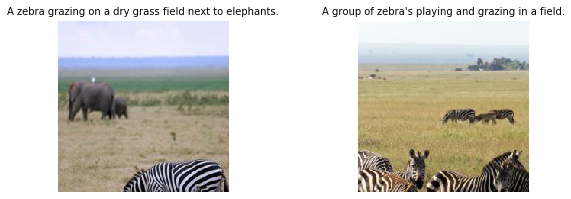

common "instance" object: zebra
number of co-activations:  238
number of common "instance" objects":  1
number of common "stuff" objects":  0 




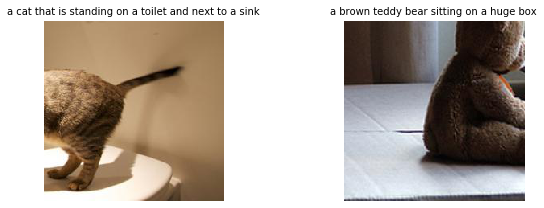

common "stuff" objects: wall-concrete
number of co-activations:  226
number of common "instance" objects":  0
number of common "stuff" objects":  1 




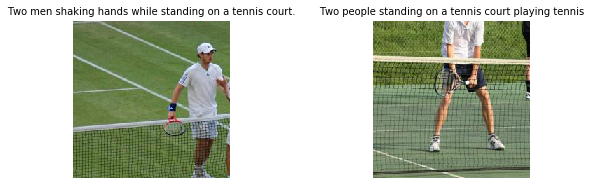

common "instance" object: person, tennis racket
common "stuff" objects: net, playingfield
number of co-activations:  225
number of common "instance" objects":  2
number of common "stuff" objects":  2 




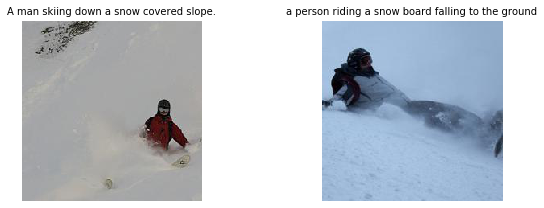

common "instance" object: person
common "stuff" objects: snow
number of co-activations:  225
number of common "instance" objects":  1
number of common "stuff" objects":  1 




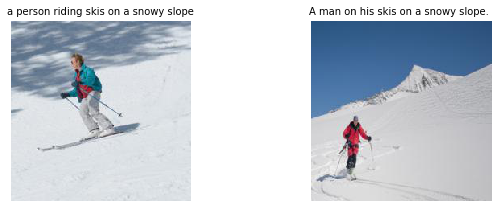

common "instance" object: person, skis
common "stuff" objects: snow
number of co-activations:  218
number of common "instance" objects":  2
number of common "stuff" objects":  1 




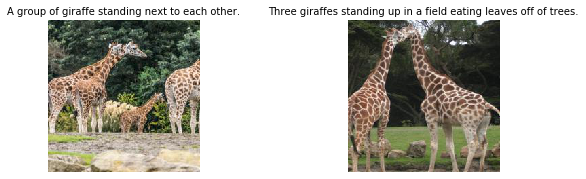

common "instance" object: giraffe
common "stuff" objects: tree, dirt, grass
number of co-activations:  217
number of common "instance" objects":  1
number of common "stuff" objects":  3 




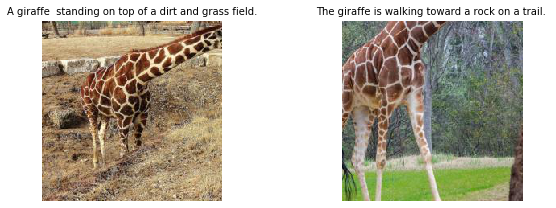

common "instance" object: giraffe
common "stuff" objects: rock, tree, dirt
number of co-activations:  213
number of common "instance" objects":  1
number of common "stuff" objects":  3 




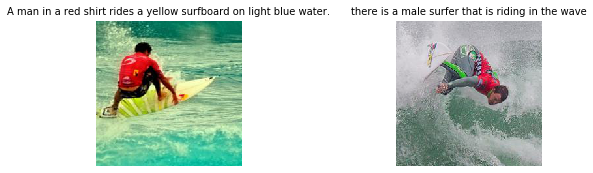

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  212
number of common "instance" objects":  2
number of common "stuff" objects":  1 




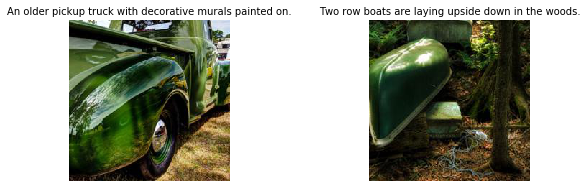

common "stuff" objects: tree
number of co-activations:  209
number of common "instance" objects":  0
number of common "stuff" objects":  1 




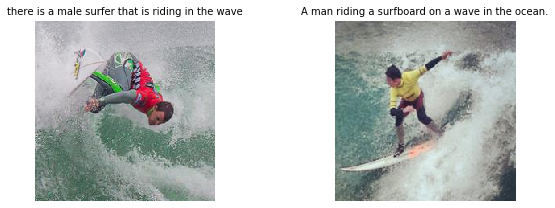

common "instance" object: surfboard, person
number of co-activations:  207
number of common "instance" objects":  2
number of common "stuff" objects":  0 




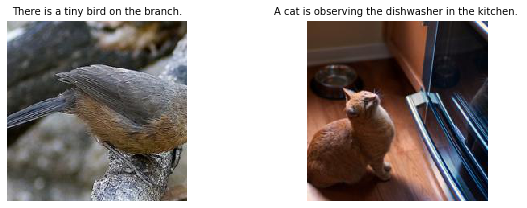

number of co-activations:  207
number of common "instance" objects":  0
number of common "stuff" objects":  0 




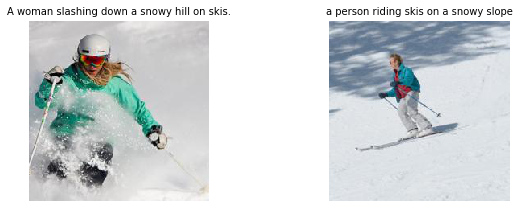

common "instance" object: person, skis
common "stuff" objects: snow
number of co-activations:  206
number of common "instance" objects":  2
number of common "stuff" objects":  1 




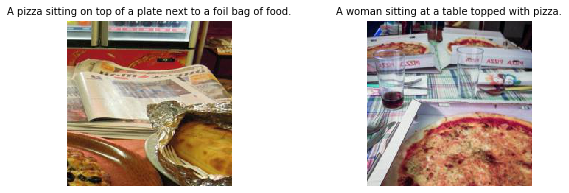

common "instance" object: dining table, pizza, cup, fork
common "stuff" objects: table
number of co-activations:  205
number of common "instance" objects":  4
number of common "stuff" objects":  1 




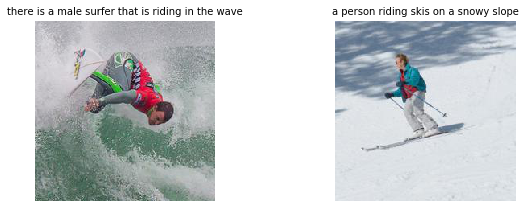

common "instance" object: person
number of co-activations:  205
number of common "instance" objects":  1
number of common "stuff" objects":  0 




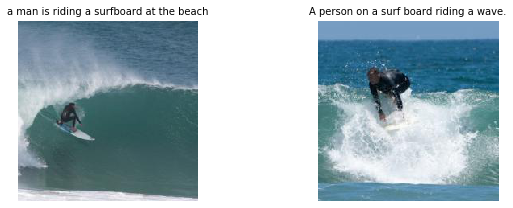

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  204
number of common "instance" objects":  2
number of common "stuff" objects":  1 




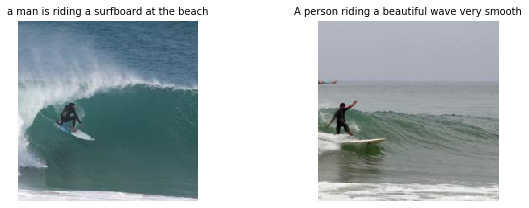

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  204
number of common "instance" objects":  2
number of common "stuff" objects":  1 




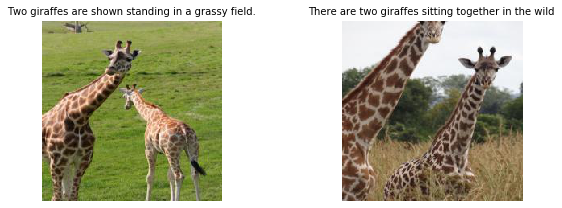

common "instance" object: giraffe
common "stuff" objects: grass
number of co-activations:  204
number of common "instance" objects":  1
number of common "stuff" objects":  1 




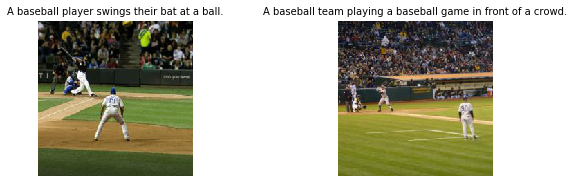

common "instance" object: person, baseball glove, baseball bat
common "stuff" objects: building-other, fence, playingfield
number of co-activations:  203
number of common "instance" objects":  3
number of common "stuff" objects":  3 




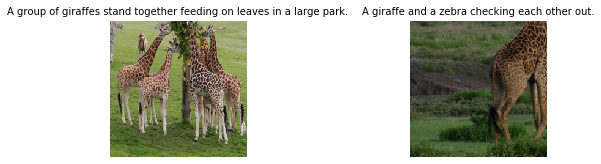

common "instance" object: giraffe, zebra
common "stuff" objects: grass
number of co-activations:  203
number of common "instance" objects":  2
number of common "stuff" objects":  1 




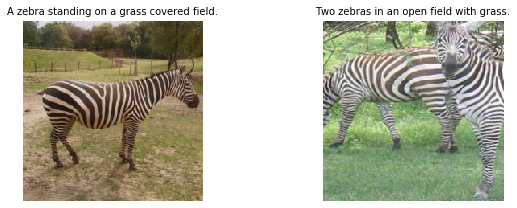

common "instance" object: zebra
common "stuff" objects: tree, grass
number of co-activations:  201
number of common "instance" objects":  1
number of common "stuff" objects":  2 




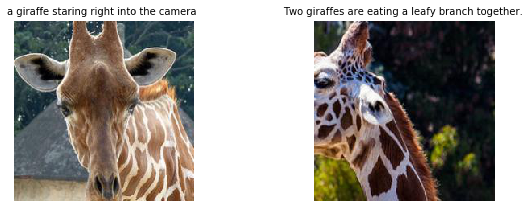

common "instance" object: giraffe
common "stuff" objects: tree
number of co-activations:  201
number of common "instance" objects":  1
number of common "stuff" objects":  1 




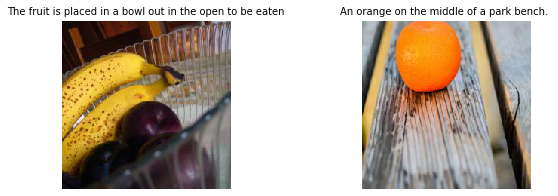

number of co-activations:  200
number of common "instance" objects":  0
number of common "stuff" objects":  0 




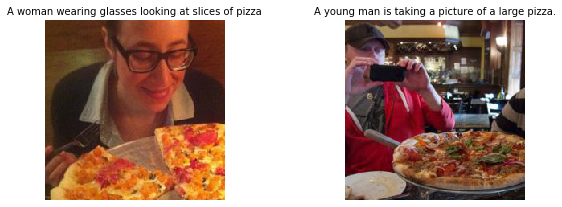

common "instance" object: pizza, person
common "stuff" objects: wall-wood, clothes
number of co-activations:  198
number of common "instance" objects":  2
number of common "stuff" objects":  2 




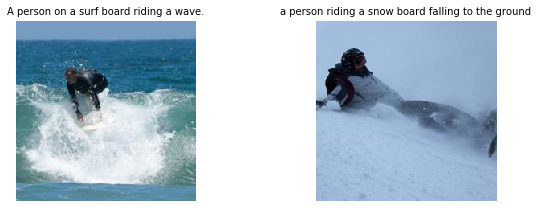

common "instance" object: person
number of co-activations:  198
number of common "instance" objects":  1
number of common "stuff" objects":  0 




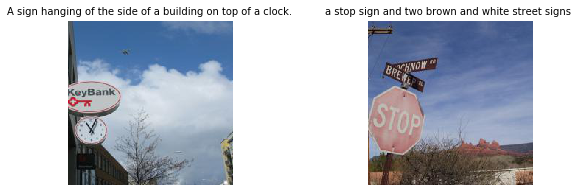

common "stuff" objects: sky-other, tree
number of co-activations:  198
number of common "instance" objects":  0
number of common "stuff" objects":  2 




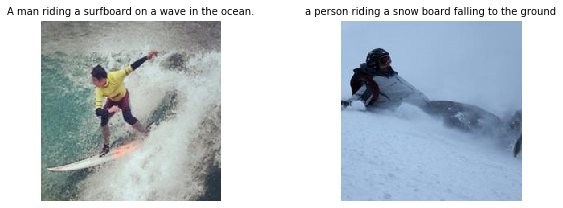

common "instance" object: person
number of co-activations:  198
number of common "instance" objects":  1
number of common "stuff" objects":  0 




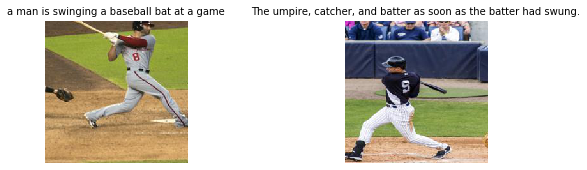

common "instance" object: person, baseball glove, baseball bat
common "stuff" objects: dirt, clothes
number of co-activations:  198
number of common "instance" objects":  3
number of common "stuff" objects":  2 




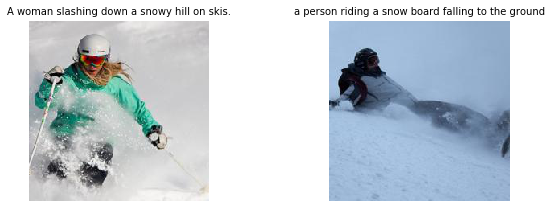

common "instance" object: person
common "stuff" objects: snow
number of co-activations:  198
number of common "instance" objects":  1
number of common "stuff" objects":  1 




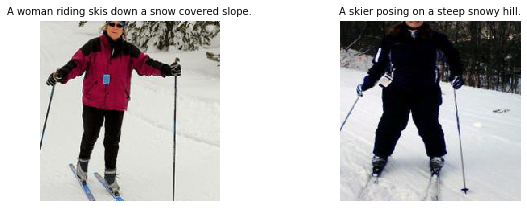

common "instance" object: person, skis
common "stuff" objects: tree, snow
number of co-activations:  198
number of common "instance" objects":  2
number of common "stuff" objects":  2 




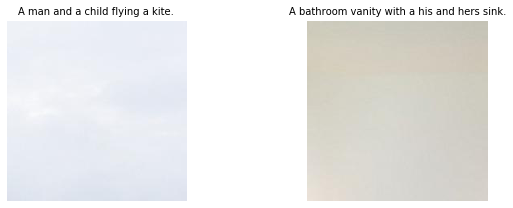

number of co-activations:  197
number of common "instance" objects":  0
number of common "stuff" objects":  0 




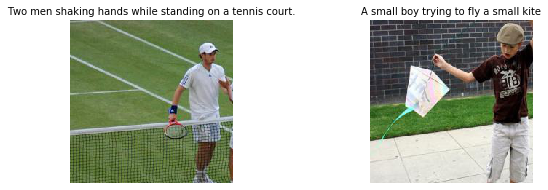

common "instance" object: person
number of co-activations:  197
number of common "instance" objects":  1
number of common "stuff" objects":  0 




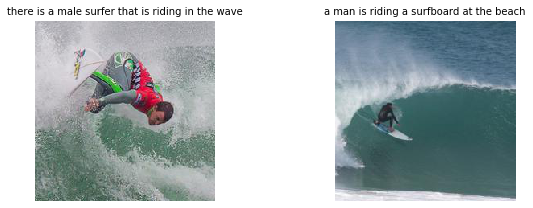

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  197
number of common "instance" objects":  2
number of common "stuff" objects":  1 




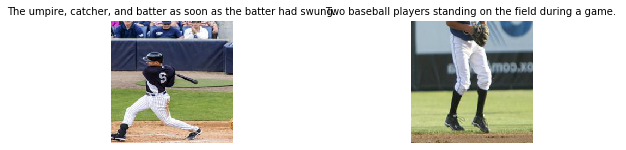

common "instance" object: person, baseball glove
common "stuff" objects: dirt, playingfield
number of co-activations:  196
number of common "instance" objects":  2
number of common "stuff" objects":  2 




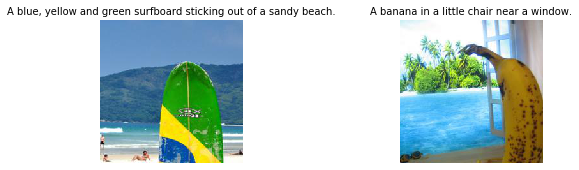

common "stuff" objects: sand, sea
number of co-activations:  195
number of common "instance" objects":  0
number of common "stuff" objects":  2 




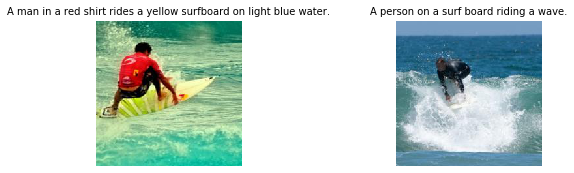

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  195
number of common "instance" objects":  2
number of common "stuff" objects":  1 




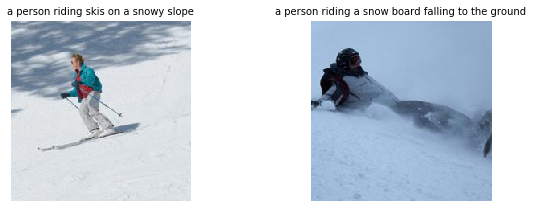

common "instance" object: person
common "stuff" objects: snow
number of co-activations:  195
number of common "instance" objects":  1
number of common "stuff" objects":  1 




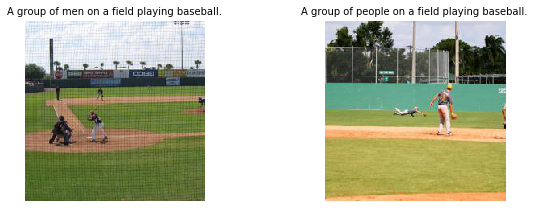

common "instance" object: person, baseball glove
common "stuff" objects: tree, playingfield, clouds
number of co-activations:  194
number of common "instance" objects":  2
number of common "stuff" objects":  3 




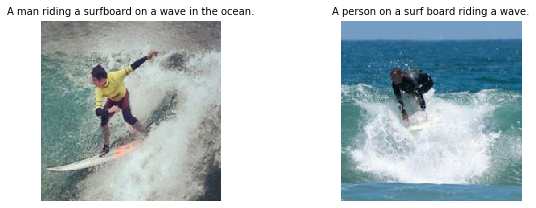

common "instance" object: surfboard, person
number of co-activations:  194
number of common "instance" objects":  2
number of common "stuff" objects":  0 




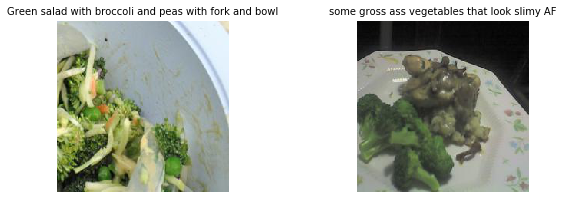

common "instance" object: broccoli
number of co-activations:  193
number of common "instance" objects":  1
number of common "stuff" objects":  0 




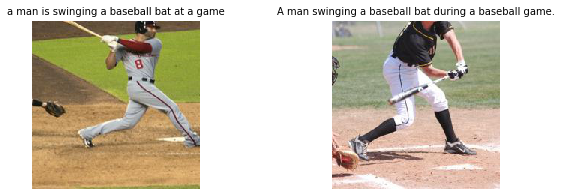

common "instance" object: person, baseball glove, baseball bat
common "stuff" objects: grass
number of co-activations:  193
number of common "instance" objects":  3
number of common "stuff" objects":  1 




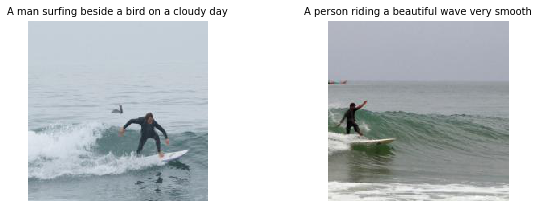

common "instance" object: surfboard, person
common "stuff" objects: sea
number of co-activations:  193
number of common "instance" objects":  2
number of common "stuff" objects":  1 




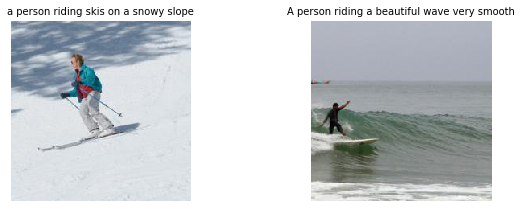

common "instance" object: person
number of co-activations:  193
number of common "instance" objects":  1
number of common "stuff" objects":  0 




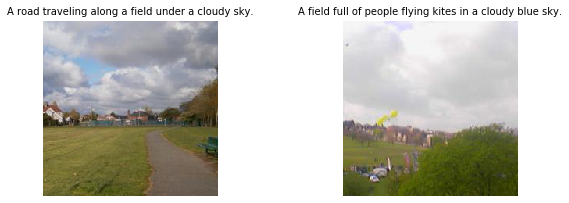

common "stuff" objects: tree, grass, clouds
number of co-activations:  193
number of common "instance" objects":  0
number of common "stuff" objects":  3 




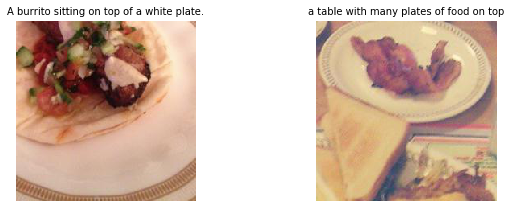

common "instance" object: dining table
number of co-activations:  192
number of common "instance" objects":  1
number of common "stuff" objects":  0 




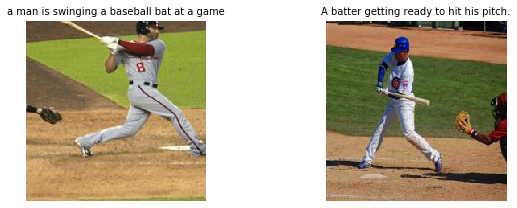

common "instance" object: person, baseball glove, baseball bat
common "stuff" objects: clothes
number of co-activations:  192
number of common "instance" objects":  3
number of common "stuff" objects":  1 




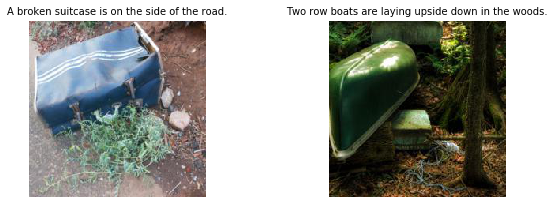

common "stuff" objects: dirt
number of co-activations:  192
number of common "instance" objects":  0
number of common "stuff" objects":  1 




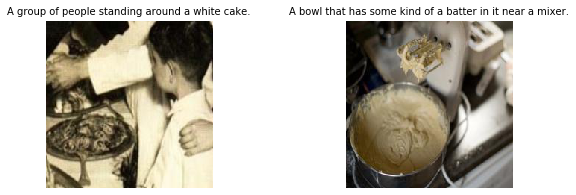

common "instance" object: cake
common "stuff" objects: food-other
number of co-activations:  192
number of common "instance" objects":  1
number of common "stuff" objects":  1 




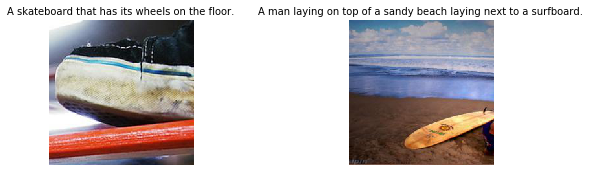

number of co-activations:  191
number of common "instance" objects":  0
number of common "stuff" objects":  0 




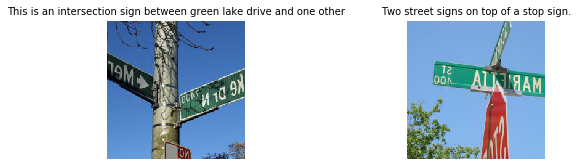

common "stuff" objects: tree, metal, sky-other
number of co-activations:  191
number of common "instance" objects":  0
number of common "stuff" objects":  3 




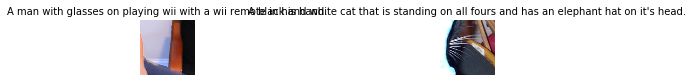

common "stuff" objects: wall-concrete, furniture-other
number of co-activations:  190
number of common "instance" objects":  0
number of common "stuff" objects":  2 




In [26]:
image_pair_indices = []
co_active_feats_list = []

num_stuff_list = []
num_instances_list = []
num_object_list = []
num_co_active_list = []

num_co_activ_stuff = collections.defaultdict(list)
num_co_activ_instances = collections.defaultdict(list)
num_co_activ_object = collections.defaultdict(list)

for index_1 in range(co_active_features_cocoval_emb.shape[0]):
    for index_2 in range(co_active_features_cocoval_emb.shape[0]):
        if (index_2 < index_1):
            image_pair_indices.append((index_1,index_2))
            co_active_feats_list.append(co_active_features_cocoval_emb[index_1,index_2])

co_active_feats_list = np.array(co_active_feats_list) 
co_active_feats_list_sorted = np.argsort(-co_active_feats_list)

count = 0

giraffe_count = 0
zebra_count = 0

for index in co_active_feats_list_sorted:
    
   
    
    ind_1,ind_2 = image_pair_indices[index][0], image_pair_indices[index][1]
    img_1, img_2 = mpimg.imread(image_id_list[ind_1]),mpimg.imread(image_id_list[ind_2])
    
    caption_1,caption_2 = captions[ind_1][0], captions[ind_2][0]
    instances_1,instances_2 = instances[ind_1], instances[ind_2]
    stuff_1, stuff_2 = stuff[ind_1], stuff[ind_2]
    
    common_instances = set(instances_1).intersection(set(instances_2))
    common_stuff = set(stuff_1).intersection(set(stuff_2))
    
    if 'other' in common_instances:
        common_instances.remove('other')
  
    if 'other' in common_stuff:
        common_stuff.remove('other')
        
    common_instances = list(common_instances)
    num_instances_list.append(len(common_instances))
        
    common_stuff = list(common_stuff)
    num_stuff_list.append(len(common_stuff))
    
    num_object_list.append(len(common_instances)+len(common_stuff))
    
        
    num_co_active_list.append(co_active_feats_list[index])
    
    num_co_activ_stuff[len(common_stuff)].append(co_active_feats_list[index])
    num_co_activ_instances[len(common_instances)].append(co_active_feats_list[index])
    num_co_activ_object[len(common_instances)+len(common_stuff)].append(co_active_feats_list[index])
    
    
    if 'zebra' in instances_1 or 'zebra' in instances_2:
        zebra_count += 1
        if(zebra_count > 5):
            continue
            
    if 'giraffe' in instances_1 or 'giraffe' in instances_2:
        giraffe_count += 1
        if(giraffe_count > 5):
            continue
    
    if count < 100:
        fig, axs = plt.subplots(1,2, figsize=(10,10))
        axs[0].imshow(img_1)
        axs[0].axis('off')
        axs[0].set_title(caption_1, fontsize=10)
        axs[1].imshow(img_2)
        axs[1].axis('off')
        axs[1].set_title(caption_2, fontsize=10)
        plt.tight_layout(pad=12.0)
        plt.show()
        
        if len(common_instances)>0 :
            print('common "instance" object:', ', '.join(common_instances))
    
        if len(common_stuff)>0 :
            print('common "stuff" objects:', ', '.join(common_stuff))
            
        print('number of co-activations: ',co_active_feats_list[index])
        print('number of common "instance" objects": ',len(common_instances))
        print('number of common "stuff" objects": ',len(common_stuff),'\n\n')
    
    count += 2
    


      


# average number of co-active embedding features  \n vs. number of common "instance" objects

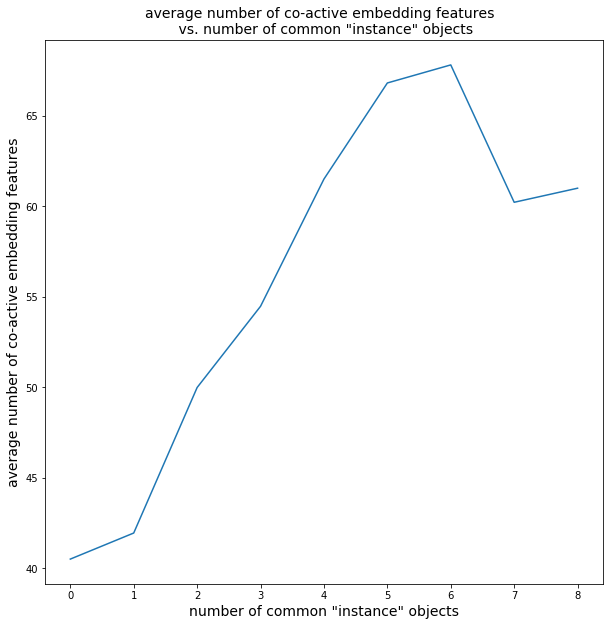

In [34]:
key_list = []
average_list = []



for key in num_co_activ_instances:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_instances[key]))

key_list = np.array(key_list)
average_list = np.array(average_list)    
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('average number of co-active embedding features  \n vs. number of common "instance" objects',fontsize=14)
plt.ylabel('average number of co-active embedding features',fontsize=14)
plt.xlabel('number of common "instance" objects',fontsize=14)

plt.show()


# average number of co-active embedding features vs. number of common "stuff" objects 


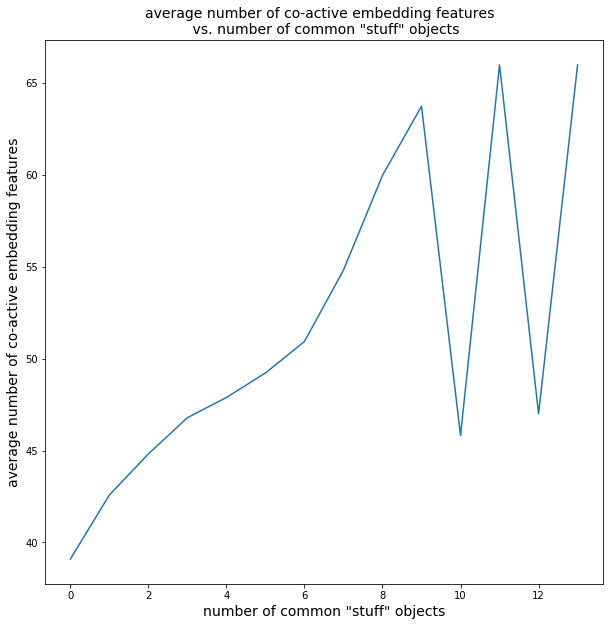

In [35]:
key_list = []
average_list = []
for key in num_co_activ_stuff:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_stuff[key]))
    
key_list = np.array(key_list)
average_list = np.array(average_list) 
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]    
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('average number of co-active embedding features  \n vs. number of common "stuff" objects',fontsize=14)
plt.ylabel('average number of co-active embedding features',fontsize=14)
plt.xlabel('number of common "stuff" objects',fontsize=14)

plt.show()


# average number of co-active embedding features  vs. number of common "instance" + "stuff" objects


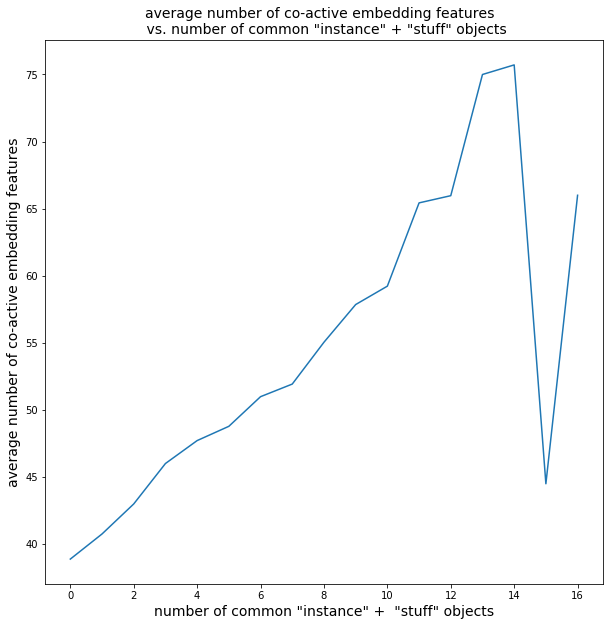

In [33]:
key_list = []
average_list = []
for key in num_co_activ_object:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_object[key]))

key_list = np.array(key_list)
average_list = np.array(average_list) 
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]     
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('average number of co-active embedding features  \n vs. number of common "instance" + "stuff" objects',fontsize=14)
plt.ylabel('average number of co-active embedding features',fontsize=14)
plt.xlabel('number of common "instance" +  "stuff" objects',fontsize=14)

plt.show()


In [ ]:
+